In [2]:
# Intro to Deep Learning 4
## Neural Network Mathematics

## Import Dependencies

In [3]:
import datetime
import numpy as np
import pandas as pd
from dateutil.parser import parse
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Masage Data
In this step I am going to drop all of the columns that are not pertinent to our solution. I then will go about conver

In [4]:
def normalize(column):
    min = column.min()
    max = column.max()
    column = (column - min)/(max - min)
    return column

In [5]:
df = pd.read_csv('database.csv')
df = df[['Date','Time','Latitude','Longitude','Magnitude']]
df = df.dropna()

# Masage the Date column to get it into days since beginning of data
df.Date = pd.to_datetime(df['Date'])
df.Date = df['Date'].values.astype('datetime64[D]')
df.Date = df.Date - df.Date.min()
df.Date = df.Date.values / np.timedelta64(1, 'D')
df.Date = df.Date.values.astype('int')

# Masage the Time column to get it in seconds since 00:00:00
df.Time = pd.to_datetime(df['Time'])
now = datetime.datetime.now()
midnight = now.replace(hour=0, minute=0, second=0, microsecond=0)
df.Time = df.Time - midnight
df.Time = df.Time.values / np.timedelta64(1, 's')
df.Time = df.Time.values.astype('int')

#Normalize data
df.Date = normalize(df.Date)
df.Time = normalize(df.Time)
df.Latitude = normalize(df.Latitude)
df.Longitude = normalize(df.Longitude)
df['NormMagnitude'] = normalize(df.Magnitude)
df['Bias'] = 1

df.head(10)




,Date,Time,Latitude,Longitude,Magnitude,NormMagnitude,Bias
0,0.000000,0.572429,0.590649,0.904493,6.0,0.138889,1
1,0.000105,0.479032,0.484060,0.853759,5.8,0.083333,1
2,0.000158,0.754152,0.346451,0.016736,6.2,0.194444,1
3,0.000316,0.784536,0.110396,0.434562,5.8,0.083333,1
4,0.000369,0.564466,0.545838,0.851190,5.8,0.083333,1
5,0.000421,0.567035,0.390441,0.962863,6.7,0.333333,1
6,0.000527,0.564176,0.640384,0.744077,5.9,0.111111,1
7,0.000685,0.970646,0.391029,0.961705,6.0,0.138889,1
8,0.000737,0.480977,0.126486,0.424878,6.0,0.138889,1
9,0.000790,0.446716,0.322022,0.995803,5.8,0.083333,1


## Visualizations

### Time of Day
The first graph we can take a look at is the distribution of earthquakes by time of day. As we can see below there appears to be a relativley equal distribution of earthquakes throughout each hour of the day.

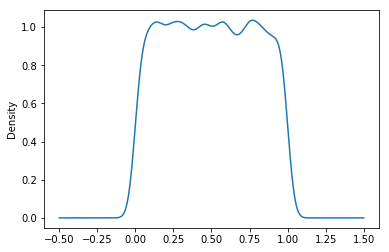

In [6]:
df['Time'].plot.kde()
plt.show()

Next we take a look at the density of earthquakes by date. As we see the number of earthquake reports seem to increase overtime. This could be due to technical improvements making it easier for scientists to capture seismic data.

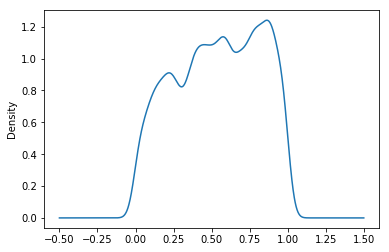

In [7]:
df['Date'].plot.kde()
plt.show()

Below we see a hexbin plot where the x axis is the the date and the y axis is the normalized time of day. We can see an increase in the overall number of reports buy no real affinity for a certain time of day.

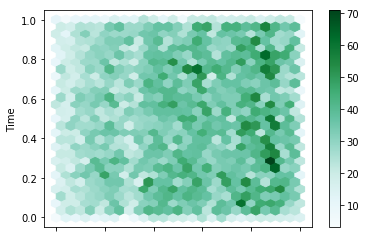

In [8]:
df.plot.hexbin(x='Date', y='Time', gridsize=25)
plt.show()

Below we look at a hexbin plot of dates compared to the magnitude of reported earthquakes.

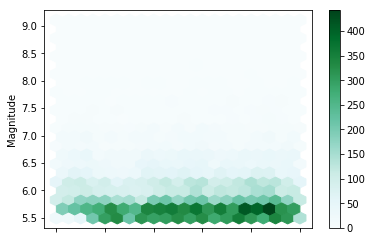

In [9]:
df.plot.hexbin(x='Date', y='Magnitude', gridsize=20)
plt.show()

Below is a histogram of the frequency of magnitudes. We can see a strong affinity for smaller earthquakes, which is good news :)

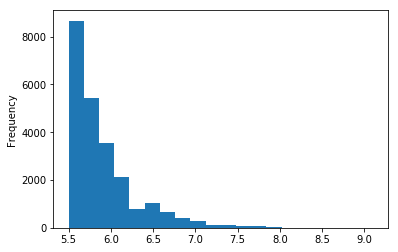

In [10]:
df.Magnitude.plot.hist(stacked=True, bins=20)
plt.show()

We all know that certain areas of the world experience a much higher frequency of earthquakes than the majority of the world. This can be seen by using a density graph below comparing density by Latitude/Longitude pair.

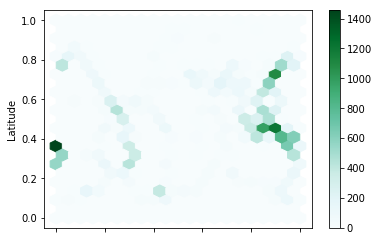

In [11]:
df.plot.hexbin(x='Longitude', y='Latitude', gridsize=20)
plt.show()

In [23]:
# Step 1 Collect Data
train, test = train_test_split(df, test_size = 0.2)

x = train.as_matrix(['Date', 'Time', 'Latitude', 'Longitude', 'Bias'])
print type(x)

print x

y = train.as_matrix(['NormMagnitude'])
print y

x_validate = test.as_matrix(['Date', 'Time', 'Latitude', 'Longitude', 'Bias'])
y_validate = test.as_matrix(['NormMagnitude'])

<type 'numpy.ndarray'>
[[ 0.69352291  0.73488049  0.47142288  0.775683    1.        ]
 [ 0.89478673  0.84099774  0.53792807  0.26332866  1.        ]
 [ 0.9478673   0.16456971  0.14460741  0.52422673  1.        ]
 ..., 
 [ 0.7509742   0.30754095  0.99061839  0.79226656  1.        ]
 [ 0.99815692  0.30998322  0.80659288  0.94598703  1.        ]
 [ 0.10942601  0.04456276  0.16478523  0.18294976  1.        ]]
[[ 0.02777778]
 [ 0.        ]
 [ 0.36111111]
 ..., 
 [ 0.02777778]
 [ 0.02777778]
 [ 0.11111111]]


In [24]:
#Step 2 build model

num_epochs = 60000

#initialize weights
syn0 = np.random.random((5,6))/10.0
syn1 = np.random.random((7,1))/10.0

syn0_delta = 0
syn1_delta = 0

In [25]:
print syn0

[[ 0.00079852  0.09433342  0.0550699   0.05168439  0.09490577  0.0923032 ]
 [ 0.07541252  0.01891907  0.04921835  0.03347656  0.02177854  0.01855908]
 [ 0.04921063  0.0077805   0.06171159  0.06936206  0.02926289  0.06401498]
 [ 0.04705061  0.00076792  0.04764971  0.07193956  0.00776755  0.05310323]
 [ 0.02991194  0.00427668  0.04925772  0.01711232  0.02307999  0.04420323]]


In [26]:
print syn1

[[ 0.00330521]
 [ 0.08682529]
 [ 0.04867791]
 [ 0.02379302]
 [ 0.04050973]
 [ 0.07689468]
 [ 0.03106333]]


In [27]:
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)

    return 1/(1+np.exp(-x))

In [28]:
#Step 3 Train Model
learning_rate = 0.002

for j in xrange(num_epochs):
    #feed forward through layers 0,1, and 2
    l0 = x
    l1 = nonlin(np.dot(l0, syn0))
    l1 = np.append(l1, np.ones((18727,1)), axis=1)
    l2 = nonlin(np.dot(l1, syn1))
    
    #how much did we miss the target value?
    l2_error = y - l2
    
    #in what direction is the target value?
    l2_delta = learning_rate * l2_error * nonlin(l2, deriv=True)
    
    #how much did each l1 value contribute to l2 error
    l1_error = l2_delta.dot(syn1.T)
    
    l1_delta = learning_rate * l1_error * nonlin(l1,deriv=True)
    
    if (j% 1000) == 0:
        print "Error:" + str(np.mean(np.abs(l2_error)))
    
    syn1_delta = l1.T.dot(l2_delta) + (learning_rate * syn1_delta)
    syn0_delta = l0.T.dot(l1_delta)[:, 0:6] + (learning_rate * syn0_delta)
    
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)[:, 0:6]
    
    

Error:0.440108603758
Error:0.106329559495
Error:0.106323348961
Error:0.106309150074
Error:0.1062439026
Error:0.0868639593186
Error:0.0868591546486
Error:0.0868544199725
Error:0.0868496639383
Error:0.0868448041216
Error:0.0868397660571
Error:0.0868344829819
Error:0.0868288962161
Error:0.0868229560953
Error:0.0868166233489
Error:0.0868098707715
Error:0.0868026849903
Error:0.0867950680772
Error:0.0867871094563
Error:0.0867790815863
Error:0.0867713194465
Error:0.0867641458604
Error:0.0867577404263
Error:0.0867521721528
Error:0.0867473323081
Error:0.086743230521
Error:0.086739842211
Error:0.0867371497563
Error:0.0867348706996
Error:0.0867329958125
Error:0.0867314143376
Error:0.0867301093812
Error:0.0867289968418
Error:0.0867280967875
Error:0.0867273518098
Error:0.0867267530818
Error:0.0867262649372
Error:0.0867258771252
Error:0.0867255493617
Error:0.0867252610115
Error:0.0867250089614
Error:0.0867247825281
Error:0.0867245740969
Error:0.0867243883793
Error:0.0867242160961
Error:0.08672405204

Let's evaluate our results

In [29]:
l0 = x_validate
l1 = nonlin(np.dot(l0, syn0))
l1 = np.append(l1, np.ones((4682,1)), axis=1)
l2 = nonlin(np.dot(l1, syn1))

l2_error = y_validate - l2
print "Error:" + str(np.mean(np.abs(l2_error)))

Error:0.0885013015451


In [44]:
error = str(np.mean(np.abs(l2_error)))

max = df['Magnitude'].max()
min = df['Magnitude'].min()

print "Average Error in Magnitude: {}".format((float(error)/(float(error) * (max-min))))

Average Error in Magnitude: 0.277777777778
